# Data Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
response = pd.read_csv("../final_data/train_outcome.csv")
response.tail()

,id,outcome
7084,7085,1
7085,7086,1
7086,7087,1
7087,7088,0
7088,7089,0


In [3]:
data = pd.read_csv("../trainData.csv")
#data = data.iloc[:,:-1]
data.tail()

,RecordID,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,...,noLabel_min,noLabel_range,noLabel_changeStoF,noLabel_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
7084,7085,65,0,3,327.213,523.99,218.71,305.28,305.28,3.0,...,NaN,NaN,NaN,NaN,7.30385,7.42,7.16,0.26,0.21,13.0
7085,7086,65,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.40200,7.43,7.37,0.06,0.02,10.0
7086,7087,71,1,1,21.180,21.18,21.18,0.00,0.00,1.0,...,NaN,NaN,NaN,NaN,7.37389,7.45,7.20,0.25,0.16,18.0
7087,7088,73,1,2,67.710,67.71,67.71,0.00,0.00,1.0,...,NaN,NaN,NaN,NaN,7.40000,7.45,7.35,0.10,-0.08,6.0
7088,7089,37,0,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Splitting Data into Training and Testing sets

In [4]:
trainIndicies = np.genfromtxt("../trainInd.txt") - 1
trainIndicies

array([4101., 6712., 3157., ..., 1767., 6283., 3952.])

In [5]:
X_train, y_train = data.iloc[trainIndicies,:].sort_index(), response.iloc[trainIndicies,:].sort_index()

In [6]:
X_train.insert(0, "Outcome", y_train["outcome"])
imputeData = X_train
X_train = X_train.drop(columns = "Outcome")

In [7]:
X_test, y_test = data.drop(trainIndicies), response.drop(trainIndicies)

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4962, 232) (4962, 2) (2127, 232) (2127, 2)


# EDA for Splitting by `AdmissionType`

In [9]:
X_train = X_train.set_index(["AdmissionType", "RecordID"]).sort_index()
X_train.head()

Age  Gender  ALP_mean  ALP_max  ALP_min  ALP_range  \
AdmissionType RecordID                                                       
1             17         40       0    85.515    86.25    84.78       1.47   
              31         47       1    88.020    88.02    88.02       0.00   
              34         57       1   100.700   100.70   100.70       0.00   
              35         68       1       NaN      NaN      NaN        NaN   
              44         68       1       NaN      NaN      NaN        NaN   

                        ALP_changeStoF  ALP_numTest  ALT_mean  ALT_max  ...  \
AdmissionType RecordID                                                  ...   
1             17                 -1.47          2.0     73.71    73.71  ...   
              31                  0.00          1.0    148.51   148.51  ...   
              34                  0.00          1.0     10.17    10.17  ...   
              35                   NaN          NaN       NaN      NaN  ...   
              44                   NaN          NaN       NaN      NaN  ...   

                        noLabel_min  noLabel_range  noLabel_changeStoF  \
AdmissionType RecordID                                                   
1             17                3.4            0.0                 0.0   
              31                NaN            NaN                 NaN   
              34                NaN            NaN                 NaN   
              35                NaN            NaN                 NaN   
              44                NaN            NaN                 NaN   

                        noLabel_numTest  pH_mean  pH_max  pH_min  pH_range  \
AdmissionType RecordID                                                       
1             17                    1.0  7.48400    7.49    7.47      0.02   
              31                    NaN  7.42571    7.47    7.38      0.09   
              34                    NaN  7.36333    7.37    7.35      0.02   
              35                    NaN      NaN     NaN     NaN       NaN   
              44                    NaN      NaN     NaN     NaN       NaN   

                        pH_changeStoF  pH_numTest  
AdmissionType RecordID                             
1             17                 0.00         5.0  
              31                -0.03         7.0  
              34                -0.02         3.0  
              35                  NaN         NaN  
              44                  NaN         NaN  

[5 rows x 230 columns]

### Checking for Columns with all `NaN` for Each `AdmissionType`  

In [10]:
## Getting percent NaN 
testNames = ["ALP", "ALT", "AST","Albumin","BUN","Bilirubin",
             "Cholesterol","Creatinine","DiasABP","FiO2","GCS",
             "Glucose","HCO3","HCT","HR","K","Lactate","MAP",
             "MechVent","Mg","NIDiasABP","NIMAP","NISysABP","Na",
             "PaCO2","PaO2","Platelets","RespRate","SAPS","SaO2",
             "SysABP","Temp","TroponinI","TroponinT","Urine","WBC",
             "noLabel","pH"]

cols = X_train.columns[2:]
colNum = 0
percents = []
for i in range(1, 5):
    percents.append([])
    colNum = 0
    for test in testNames:
        p = X_train.loc[i,cols[colNum]].isna().sum() / X_train.loc[i,cols[colNum]].shape[0] # number of NaN / total
        percents[i - 1].append(p)
        colNum += 6            

In [11]:
AdmissionType1 = pd.DataFrame(np.array(percents[0])*100, index = testNames).sort_values(by = 0, ascending=False)
AdmissionType2 = pd.DataFrame(np.array(percents[1])*100, index = testNames).sort_values(by = 0, ascending=False)
AdmissionType3 = pd.DataFrame(np.array(percents[2])*100, index = testNames).sort_values(by = 0, ascending=False)
AdmissionType4 = pd.DataFrame(np.array(percents[3])*100, index = testNames).sort_values(by = 0, ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'TroponinI'),
  Text(1, 0, 'noLabel'),
  Text(2, 0, 'Cholesterol'),
  Text(3, 0, 'Lactate'),
  Text(4, 0, 'Albumin'),
  Text(5, 0, 'MechVent'),
  Text(6, 0, 'TroponinT'),
  Text(7, 0, 'RespRate'),
  Text(8, 0, 'ALP'),
  Text(9, 0, 'ALT'),
  Text(10, 0, 'Bilirubin'),
  Text(11, 0, 'FiO2'),
  Text(12, 0, 'AST'),
  Text(13, 0, 'SaO2'),
  Text(14, 0, 'PaCO2'),
  Text(15, 0, 'PaO2'),
  Text(16, 0, 'pH'),
  Text(17, 0, 'SysABP'),
  Text(18, 0, 'DiasABP'),
  Text(19, 0, 'MAP'),
  Text(20, 0, 'NIMAP'),
  Text(21, 0, 'NIDiasABP'),
  Text(22, 0, 'NISysABP'),
  Text(23, 0, 'SAPS'),
  Text(24, 0, 'Mg'),
  Text(25, 0, 'Urine'),
  Text(26, 0, 'WBC'),
  Text(27, 0, 'Na'),
  Text(28, 0, 'HCO3'),
  Text(29, 0, 'Platelets'),
  Text(30, 0, 'BUN'),
  Text(31, 0, 'Glucose'),
  Text(32, 0, 'HCT'),
  Text(33, 0, 'Creatin

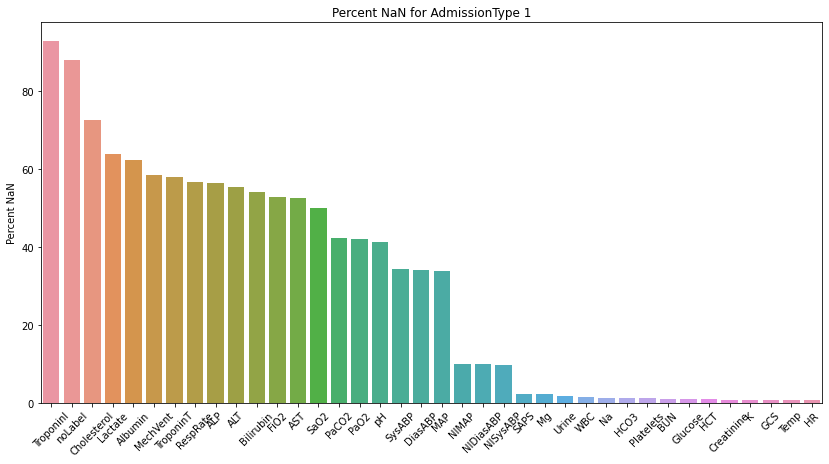

In [12]:
plt.figure(figsize=(14,7))
sns.barplot(x=AdmissionType1.index, y=AdmissionType1[0])
plt.title("Percent NaN for AdmissionType 1")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Cholesterol'),
  Text(1, 0, 'TroponinI'),
  Text(2, 0, 'RespRate'),
  Text(3, 0, 'noLabel'),
  Text(4, 0, 'TroponinT'),
  Text(5, 0, 'Albumin'),
  Text(6, 0, 'AST'),
  Text(7, 0, 'Bilirubin'),
  Text(8, 0, 'ALP'),
  Text(9, 0, 'ALT'),
  Text(10, 0, 'Lactate'),
  Text(11, 0, 'NIMAP'),
  Text(12, 0, 'NISysABP'),
  Text(13, 0, 'NIDiasABP'),
  Text(14, 0, 'FiO2'),
  Text(15, 0, 'SaO2'),
  Text(16, 0, 'Glucose'),
  Text(17, 0, 'MechVent'),
  Text(18, 0, 'K'),
  Text(19, 0, 'Mg'),
  Text(20, 0, 'PaO2'),
  Text(21, 0, 'Na'),
  Text(22, 0, 'MAP'),
  Text(23, 0, 'DiasABP'),
  Text(24, 0, 'SysABP'),
  Text(25, 0, 'pH'),
  Text(26, 0, 'PaCO2'),
  Text(27, 0, 'HCO3'),
  Text(28, 0, 'WBC'),
  Text(29, 0, 'SAPS'),
  Text(30, 0, 'Platelets'),
  Text(31, 0, 'Urine'),
  Text(32, 0, 'HR'),
  Text(33, 0, 'Temp'),
  

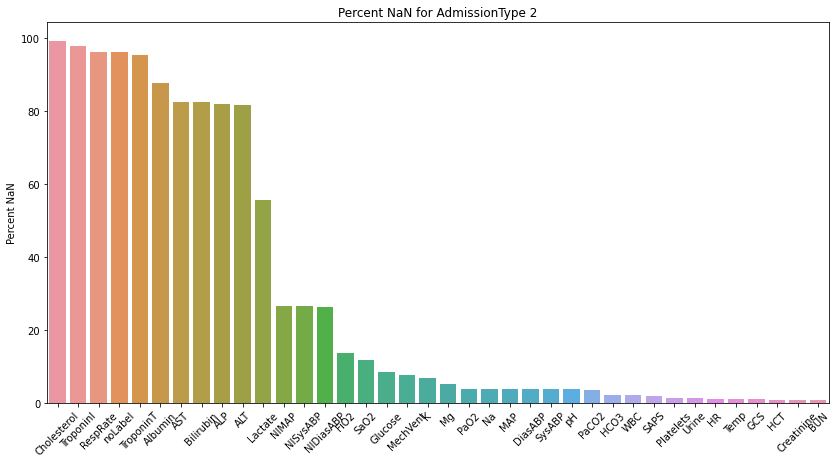

In [13]:
plt.figure(figsize=(14,7))
sns.barplot(x=AdmissionType2.index, y=AdmissionType2[0])
plt.title("Percent NaN for AdmissionType 2")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Cholesterol'),
  Text(1, 0, 'TroponinI'),
  Text(2, 0, 'noLabel'),
  Text(3, 0, 'SaO2'),
  Text(4, 0, 'TroponinT'),
  Text(5, 0, 'RespRate'),
  Text(6, 0, 'MAP'),
  Text(7, 0, 'DiasABP'),
  Text(8, 0, 'SysABP'),
  Text(9, 0, 'Albumin'),
  Text(10, 0, 'ALP'),
  Text(11, 0, 'ALT'),
  Text(12, 0, 'MechVent'),
  Text(13, 0, 'AST'),
  Text(14, 0, 'Bilirubin'),
  Text(15, 0, 'Lactate'),
  Text(16, 0, 'FiO2'),
  Text(17, 0, 'PaO2'),
  Text(18, 0, 'pH'),
  Text(19, 0, 'PaCO2'),
  Text(20, 0, 'NISysABP'),
  Text(21, 0, 'NIMAP'),
  Text(22, 0, 'NIDiasABP'),
  Text(23, 0, 'SAPS'),
  Text(24, 0, 'Urine'),
  Text(25, 0, 'HR'),
  Text(26, 0, 'GCS'),
  Text(27, 0, 'Temp'),
  Text(28, 0, 'Mg'),
  Text(29, 0, 'WBC'),
  Text(30, 0, 'Platelets'),
  Text(31, 0, 'HCO3'),
  Text(32, 0, 'Glucose'),
  Text(33, 0, 'Creati

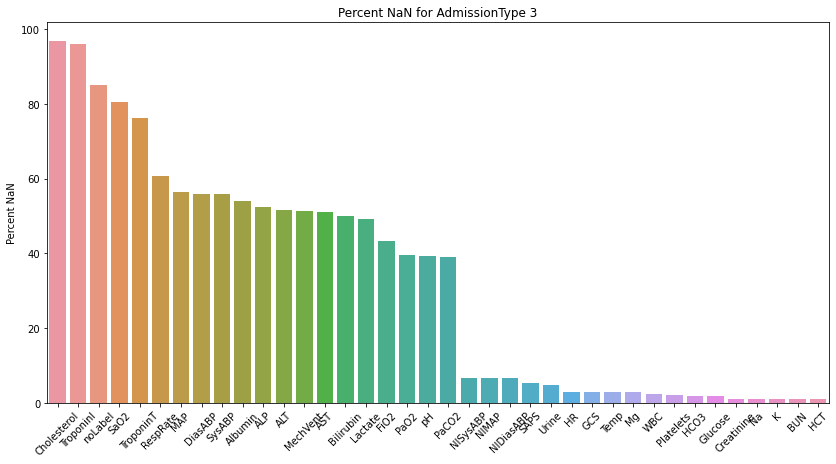

In [14]:
plt.figure(figsize=(14,7))
sns.barplot(x=AdmissionType3.index, y=AdmissionType3[0]) 
plt.title("Percent NaN for AdmissionType 3")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'TroponinI'),
  Text(1, 0, 'Cholesterol'),
  Text(2, 0, 'noLabel'),
  Text(3, 0, 'TroponinT'),
  Text(4, 0, 'SaO2'),
  Text(5, 0, 'RespRate'),
  Text(6, 0, 'Bilirubin'),
  Text(7, 0, 'ALP'),
  Text(8, 0, 'Albumin'),
  Text(9, 0, 'AST'),
  Text(10, 0, 'ALT'),
  Text(11, 0, 'Lactate'),
  Text(12, 0, 'MechVent'),
  Text(13, 0, 'FiO2'),
  Text(14, 0, 'PaCO2'),
  Text(15, 0, 'PaO2'),
  Text(16, 0, 'pH'),
  Text(17, 0, 'MAP'),
  Text(18, 0, 'SysABP'),
  Text(19, 0, 'DiasABP'),
  Text(20, 0, 'NIDiasABP'),
  Text(21, 0, 'NIMAP'),
  Text(22, 0, 'NISysABP'),
  Text(23, 0, 'Mg'),
  Text(24, 0, 'Glucose'),
  Text(25, 0, 'K'),
  Text(26, 0, 'BUN'),
  Text(27, 0, 'HCO3'),
  Text(28, 0, 'Platelets'),
  Text(29, 0, 'HCT'),
  Text(30, 0, 'WBC'),
  Text(31, 0, 'SAPS'),
  Text(32, 0, 'Creatinine'),
  Text(33, 0, 'Na'

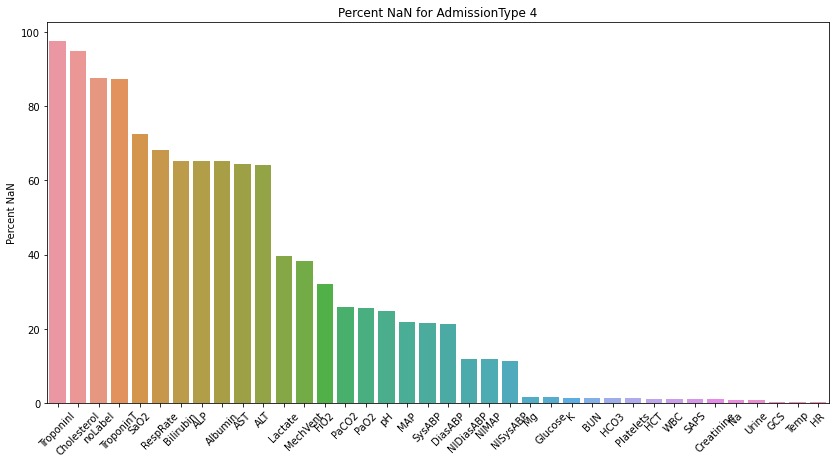

In [15]:
plt.figure(figsize=(14,7))
sns.barplot(x=AdmissionType4.index, y=AdmissionType4[0])
plt.title("Percent NaN for AdmissionType 4")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

We can see for each `admissionType` there are many variables that have a lot of `NaN`. We can drop the ones over a particular percent, then run a dimention reduction technique. Or we can keep all them, then run dimention reduction. Either way, we may need to fill the `NaN`'s with some value that is not in any of the variable values. This may be easier if we standardize/normalize our data first.

### Impute Data

First, I will impute 0 for `numTest`, `range`, and `changeStoF` part of the missing variables. This is not really imputing for `numTest`, its just that I filled with `NaN` instead of 0 because the variable had nothing else. For every test with `NaN` for `numTest`, literally just have had 0 test. As for the `range` and `changeStoF`, filling with 0 is reasonable. This is because we assume if there has been no test taken, then they are stable for that test. Thus, the we'd expect if the test was taken they would be consistent over time.

In [16]:
imputeData = imputeData.set_index(["AdmissionType", "RecordID"]).sort_index()
X_test = X_test.set_index(["AdmissionType","RecordID"]).sort_index()

c = np.sort(list(range(5,233,6)) + list(range(6,233,6)) + list(range(7,233,6))) # index of range, changeStoF, and numTest
X_train.iloc[:,c] = X_train.iloc[:,c].fillna(0) # indexes to those columns and fills NaN's with 0
X_test.iloc[:,c] = X_test.iloc[:,c].fillna(0)
imputeData.iloc[:,c+1] = imputeData.iloc[:,c+1].fillna(0)

In [17]:
imputeData.head()

Outcome  Age  Gender  ALP_mean  ALP_max  ALP_min  \
AdmissionType RecordID                                                     
1             17              1   40       0    85.515    86.25    84.78   
              31              0   47       1    88.020    88.02    88.02   
              34              1   57       1   100.700   100.70   100.70   
              35              1   68       1       NaN      NaN      NaN   
              44              1   68       1       NaN      NaN      NaN   

                        ALP_range  ALP_changeStoF  ALP_numTest  ALT_mean  ...  \
AdmissionType RecordID                                                    ...   
1             17             1.47           -1.47          2.0     73.71  ...   
              31             0.00            0.00          1.0    148.51  ...   
              34             0.00            0.00          1.0     10.17  ...   
              35             0.00            0.00          0.0       NaN  ...   
              44             0.00            0.00          0.0       NaN  ...   

                        noLabel_min  noLabel_range  noLabel_changeStoF  \
AdmissionType RecordID                                                   
1             17                3.4            0.0                 0.0   
              31                NaN            0.0                 0.0   
              34                NaN            0.0                 0.0   
              35                NaN            0.0                 0.0   
              44                NaN            0.0                 0.0   

                        noLabel_numTest  pH_mean  pH_max  pH_min  pH_range  \
AdmissionType RecordID                                                       
1             17                    1.0  7.48400    7.49    7.47      0.02   
              31                    0.0  7.42571    7.47    7.38      0.09   
              34                    0.0  7.36333    7.37    7.35      0.02   
              35                    0.0      NaN     NaN     NaN      0.00   
              44                    0.0      NaN     NaN     NaN      0.00   

                        pH_changeStoF  pH_numTest  
AdmissionType RecordID                             
1             17                 0.00         5.0  
              31                -0.03         7.0  
              34                -0.02         3.0  
              35                 0.00         0.0  
              44                 0.00         0.0  

[5 rows x 231 columns]

For `mean`, `min`, and `max`, we cannot just fill with 0. This is because 0 for each of these could have meanings we do not want. However, since `range` and `changeStoF` are both 0, `min` = `max` = `mean` must hold. Thus we only need to look at the means of the test's. I will first look at these split on the `y_train`, this is to see if there seems to be a stable number. We would use this number for train and test set. This is because it is assumed these are test values that are in the normal range, which is what we ant to assume for the test with `NaN`. I will also look at it for `Age` categories and `Gender`.

In [18]:
c = list(range(3,231,6))
means = imputeData.iloc[:,[0,1,2]+c]

In [19]:
young = means[means["Age"] < 35]
midage = means[(means["Age"] < 65) & (means["Age"] >= 35)]
old = means[means["Age"] >= 65]

In [20]:
test1 = [means[(means["Gender"] == 0) & (means["Outcome"] == 0)].iloc[:,3:].median(), 
young[(young["Gender"] == 0) & (young["Outcome"] == 0)].iloc[:,3:].median(),
midage[(midage["Gender"] == 0) & (midage["Outcome"] == 0)].iloc[:,3:].median(),
old[(old["Gender"] == 0) & (old["Outcome"] == 0)].iloc[:,3:].median()]
test2 = [means[(means["Gender"] == 1) & (means["Outcome"] == 0)].iloc[:,3:].median(),
young[(young["Gender"] == 1) & (young["Outcome"] == 0)].iloc[:,3:].median(),
midage[(midage["Gender"] == 1) & (midage["Outcome"] == 0)].iloc[:,3:].median(),
old[(old["Gender"] == 1) & (old["Outcome"] == 0)].iloc[:,3:].median()]

In [21]:
ages = pd.DataFrame()
ages["young"] = test1[1]
ages["mid"] = test1[2]
ages["old"] = test1[3]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

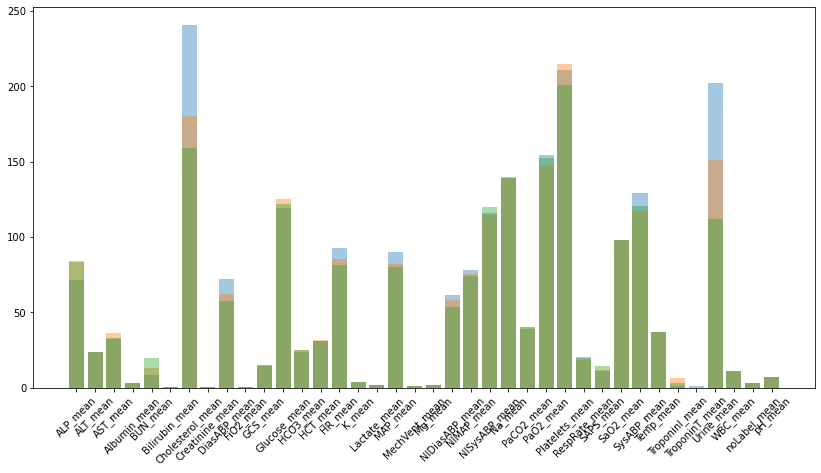

In [22]:
plt.figure(figsize=(14,7))
plt.bar(x = ages["young"].index, height = ages["young"], alpha = .4)
plt.bar(x = ages["mid"].index, height = ages["mid"], alpha = .4)
plt.bar(x = ages["old"].index, height = ages["old"], alpha = .4)
plt.xticks(rotation=45)

In [23]:
ages = pd.DataFrame()
ages["young"] = test2[1]
ages["mid"] = test2[2]
ages["old"] = test2[3]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

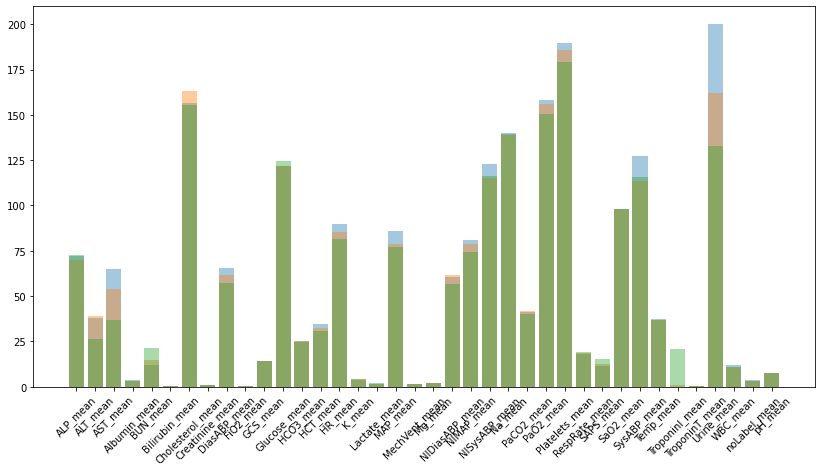

In [24]:
plt.figure(figsize=(14,7))
plt.bar(x = ages["young"].index, height = ages["young"], alpha = .4)
plt.bar(x = ages["mid"].index, height = ages["mid"], alpha = .4)
plt.bar(x = ages["old"].index, height = ages["old"], alpha = .4)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

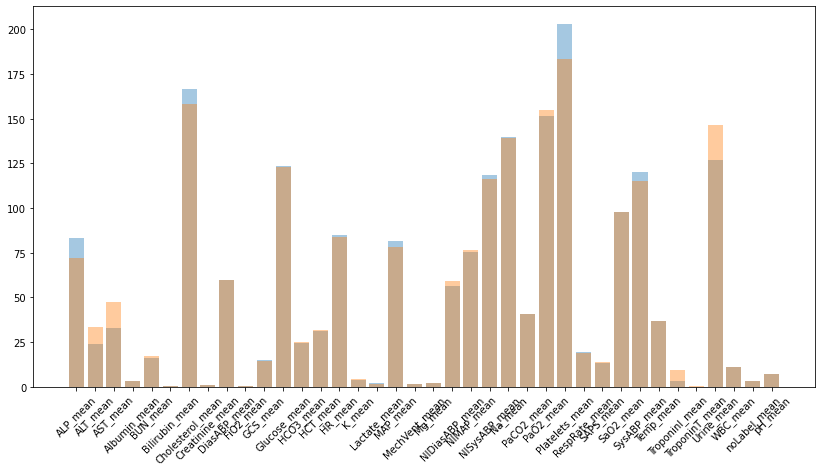

In [25]:
plt.figure(figsize=(14,7))
plt.bar(x = test1[0].index, height = test1[0], alpha = .4)
plt.bar(x = test2[0].index, height = test2[0], alpha = .4)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

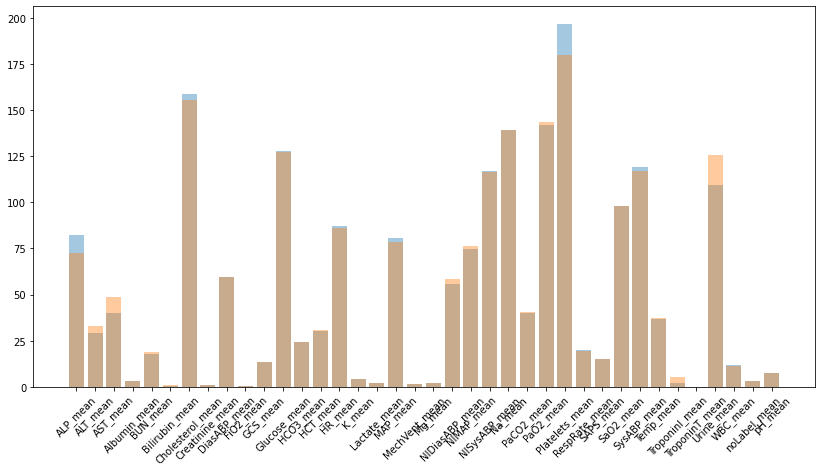

In [26]:
test1 = means[(means["Gender"] == 0)].iloc[:,3:].median()
test2 = means[(means["Gender"] == 1)].iloc[:,3:].median()
plt.figure(figsize=(14,7))
plt.bar(x = test1.index, height = test1, alpha = .4)
plt.bar(x = test2.index, height = test2, alpha = .4)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

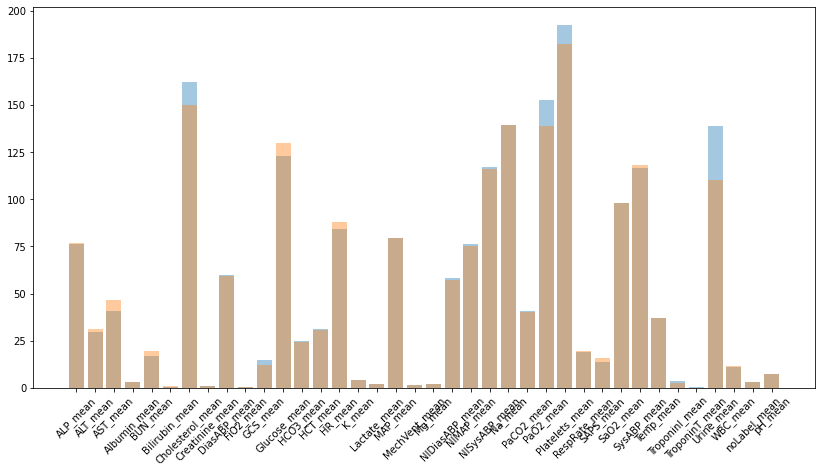

In [27]:
test1 = means[(means["Outcome"] == 0)].iloc[:,3:].median()
test2 = means[(means["Outcome"] == 1)].iloc[:,3:].median()
plt.figure(figsize=(14,7))
plt.bar(x = test1.index, height = test1, alpha = .4)
plt.bar(x = test2.index, height = test2, alpha = .4)
plt.xticks(rotation=45)

In [28]:
numTestCols = list(range(8,232,6))
i = 0
for col in numTestCols:
    equ1med = means[imputeData.iloc[:,col] == 1].iloc[:,i+3].median()
    nequ1med = means[imputeData.iloc[:,col] != 1].iloc[:,i+3].median()
    if (1.3 <= (equ1med / nequ1med)) | (.7 >= (equ1med / nequ1med)):
        print(means.columns[i+3], i+3, col)
    i += 1

ALT_mean 4 14
AST_mean 5 20
Bilirubin_mean 8 38
TroponinI_mean 35 200
TroponinT_mean 36 206
Urine_mean 37 212


In [29]:
equ1 = [(imputeData.iloc[:,14] == 1), (imputeData.iloc[:,20] == 1), (imputeData.iloc[:,38] == 1),
        (imputeData.iloc[:,200] == 1), (imputeData.iloc[:,206] == 1), (imputeData.iloc[:,212] == 1)]
nequ1 = [(imputeData.iloc[:,14] != 1), (imputeData.iloc[:,20] != 1), (imputeData.iloc[:,38] != 1),
         (imputeData.iloc[:,200] != 1), (imputeData.iloc[:,206] != 1), (imputeData.iloc[:,212] != 1)]

In [30]:
equ1med = []
cols= [4,5,8,35,36,37]
for i in range(len(cols)):
    equ1med.append(means[equ1[i]].iloc[:,cols[i]].median())
    
nequ1med = []
cols= [4,5,8,35,36,37]
for i in range(len(cols)):
    nequ1med.append(means[nequ1[i]].iloc[:,cols[i]].median())

<BarContainer object of 6 artists>

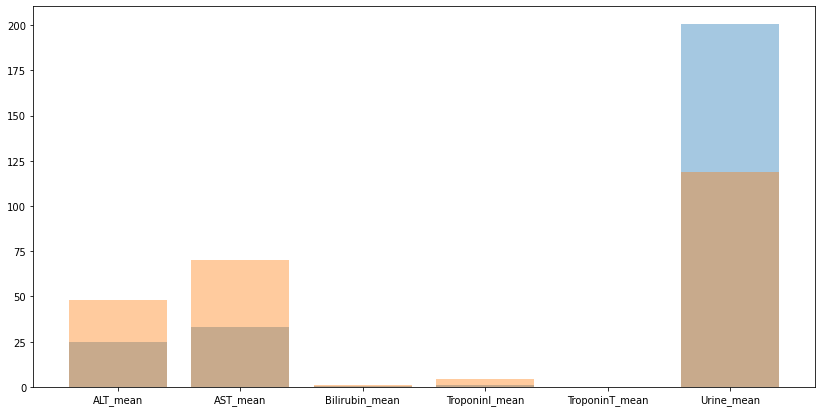

In [31]:
plt.figure(figsize=(14,7))
plt.bar(x = means.columns[cols], height = equ1med, alpha = .4)
plt.bar(x = means.columns[cols], height = nequ1med, alpha = .4)
#plt.xticks(rotation=45)

For test with high amount of missing data, I will not split the data. Due to the high amount of outliers I will take the median of the tests. I will split the data in a few ways. First, I will only take the `outcome == 0` because 0 is for recovery. Then, I will split by `Gender` because we can see for a few tests this creates a large split in the median. Lastly, I will split by `age`, into 3 categories: x < 35, 35 <= x < 65, 65 <= x.

In [32]:
#Drop no label
X_train = X_train.drop(columns = X_train.columns[218:224])
X_test = X_test.drop(columns = X_test.columns[218:224])

In [33]:
## Getting percent NaN for all the data
testNames = ["ALP", "ALT", "AST","Albumin","BUN","Bilirubin",
             "Cholesterol","Creatinine","DiasABP","FiO2","GCS",
             "Glucose","HCO3","HCT","HR","K","Lactate","MAP",
             "MechVent","Mg","NIDiasABP","NIMAP","NISysABP","Na",
             "PaCO2","PaO2","Platelets","RespRate","SAPS","SaO2",
             "SysABP","Temp","TroponinI","TroponinT","Urine","WBC","pH"]

cols = X_train.columns[2:]
colNum = 0
percents = []
for test in testNames:
    p = X_train.loc[:,cols[colNum]].isna().sum() / X_train.loc[:,cols[colNum]].shape[0] # number of NaN / total
    percents.append(p)
    colNum += 6    

In [34]:
# cols with percent missing over 50 %
cols = cols[range(0,220,6)]
lotsMissing = []

for i in range(len(percents)):
    if (percents[i] > .5):
        lotsMissing.append(cols[i])

In [35]:
# fill NaN of lots missing
medians = X_train[lotsMissing].median()

for col in lotsMissing:
    X_train[col] = X_train[col].fillna(medians[col])

In [36]:
X_train[lotsMissing].head()

ALP_mean  ALT_mean  AST_mean  Albumin_mean  \
AdmissionType RecordID                                               
1             17          85.515     73.71    60.440           3.6   
              31          88.020    148.51    84.880           3.4   
              34         100.700     10.17    22.000           3.1   
              35          76.670     30.99    44.785           3.1   
              44          76.670     30.99    44.785           3.1   

                        Bilirubin_mean  Cholesterol_mean  Lactate_mean  \
AdmissionType RecordID                                                   
1             17                  0.65            149.90           1.2   
              31                  0.50            162.82           1.9   
              34                  0.70            155.88           1.9   
              35                  0.70            149.92           1.9   
              44                  0.70            155.88           1.9   

                        RespRate_mean  SaO2_mean  TroponinI_mean  \
AdmissionType RecordID                                             
1             17              23.7809    94.3271             3.3   
              31              19.4688    98.4700            19.1   
              34              17.7970    97.9000             3.3   
              35              14.8505    97.9000             3.3   
              44              19.4688    97.9000             3.3   

                        TroponinT_mean  
AdmissionType RecordID                  
1             17                 0.020  
              31                 0.130  
              34                 0.125  
              35                 0.130  
              44                 0.130

In [37]:
X_train

Age  Gender  ALP_mean  ALP_max  ALP_min  ALP_range  \
AdmissionType RecordID                                                       
1             17         40       0    85.515    86.25    84.78       1.47   
              31         47       1    88.020    88.02    88.02       0.00   
              34         57       1   100.700   100.70   100.70       0.00   
              35         68       1    76.670      NaN      NaN       0.00   
              44         68       1    76.670      NaN      NaN       0.00   
...                     ...     ...       ...      ...      ...        ...   
4             7060       36       0    50.960    50.96    50.96       0.00   
              7066       81       0    76.670      NaN      NaN       0.00   
              7074       76       1    76.670      NaN      NaN       0.00   
              7078       34       1    76.670      NaN      NaN       0.00   
              7089       37       0    76.670      NaN      NaN       0.00   

                        ALP_changeStoF  ALP_numTest  ALT_mean  ALT_max  ...  \
AdmissionType RecordID                                                  ...   
1             17                 -1.47          2.0     73.71    73.71  ...   
              31                  0.00          1.0    148.51   148.51  ...   
              34                  0.00          1.0     10.17    10.17  ...   
              35                  0.00          0.0     30.99      NaN  ...   
              44                  0.00          0.0     30.99      NaN  ...   
...                                ...          ...       ...      ...  ...   
4             7060                0.00          1.0     40.06    41.35  ...   
              7066                0.00          0.0     30.99      NaN  ...   
              7074                0.00          0.0     30.99      NaN  ...   
              7078                0.00          0.0     30.99      NaN  ...   
              7089                0.00          0.0     30.99      NaN  ...   

                        WBC_min  WBC_range  WBC_changeStoF  WBC_numTest  \
AdmissionType RecordID                                                    
1             17          10.40       5.70            5.70          2.0   
              31           9.90      12.70          -12.70          4.0   
              34           7.60       4.60           -4.60          4.0   
              35           9.60       0.00            0.00          1.0   
              44          11.30       1.67           -1.67          2.0   
...                         ...        ...             ...          ...   
4             7060        10.59       7.51           -7.51          5.0   
              7066         9.30       2.30           -2.30          2.0   
              7074         6.40       9.40           -8.33          5.0   
              7078        14.80       0.10            0.10          2.0   
              7089         9.30       0.00            0.00          1.0   

                        pH_mean  pH_max  pH_min  pH_range  pH_changeStoF  \
AdmissionType RecordID                                                     
1             17        7.48400    7.49    7.47      0.02           0.00   
              31        7.42571    7.47    7.38      0.09          -0.03   
              34        7.36333    7.37    7.35      0.02          -0.02   
              35            NaN     NaN     NaN      0.00           0.00   
              44            NaN     NaN     NaN      0.00           0.00   
...                         ...     ...     ...       ...            ...   
4             7060      7.26333    7.28    7.25      0.03           0.02   
              7066      7.35500    7.39    7.32      0.07           0.01   
              7074      7.37800    7.43    7.35      0.08           0.08   
              7078          NaN     NaN     NaN      0.00           0.00   
              7089          NaN     NaN     NaN      0.00           0.00   

                

In [38]:
lotsMissingMedians = medians

In [39]:
agesGen0, agesGen1 = pd.DataFrame(), pd.DataFrame()

gen0 = [young[(young["Gender"] == 0) & (young["Outcome"] == 0)].iloc[:,3:].median(),
        midage[(midage["Gender"] == 0) & (midage["Outcome"] == 0)].iloc[:,3:].median(),
        old[(old["Gender"] == 0) & (old["Outcome"] == 0)].iloc[:,3:].median()]
gen1 = [young[(young["Gender"] == 1) & (young["Outcome"] == 0)].iloc[:,3:].median(),
        midage[(midage["Gender"] == 1) & (midage["Outcome"] == 0)].iloc[:,3:].median(),
        old[(old["Gender"] == 1) & (old["Outcome"] == 0)].iloc[:,3:].median()]

agesGen0["under35"], agesGen1["under35"] = gen0[0].drop(lotsMissing), gen1[0].drop(lotsMissing)
agesGen0["betw35to60"], agesGen1["betw35to60"] = gen0[1].drop(lotsMissing), gen1[1].drop(lotsMissing)
agesGen0["over65"], agesGen1["over65"] = gen0[2].drop(lotsMissing), gen1[2].drop(lotsMissing)

In [40]:
## this fills just the medians
#cols = list(range(2,224,6))
#medians = X_train.iloc[:,cols].median()
#count = 0
#
#for col in cols:
#    for i in range(3):
#        X_train.iloc[:,col+i] = X_train.iloc[:,col+i].fillna(medians[count])
#    count += 1
agesGen0 = agesGen0.drop("noLabel_mean")
agesGen1 = agesGen1.drop("noLabel_mean")

In [41]:
#Filling mean, max, and min with the median mean value according to category
otherVarForTest = ["max", "min"]
agesGen0.index[0][:-4] +"max"

for test in agesGen0.index:
    X_train.loc[(X_train["Gender"] == 0) & (X_train["Age"] < 35),[test,
                                                              test[:-4] +"max",
                                                              test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == 0) & (X_train["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"under35"])
    
    X_train.loc[(X_train["Gender"] == 0) & (X_train["Age"] >= 35)  & (X_train["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == 0) & (X_train["Age"] >= 35)  & (X_train["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"betw35to60"])

    X_train.loc[(X_train["Gender"] == 0) & (X_train["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == 0) & (X_train["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"over65"])
    
    X_train.loc[(X_train["Gender"] == 1) & (X_train["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == 1) & (X_train["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    X_train.loc[(X_train["Gender"] == 1) & (X_train["Age"] >= 35)  & (X_train["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == 1) & (X_train["Age"] >= 35)  & (X_train["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    X_train.loc[(X_train["Gender"] == 1) & (X_train["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == 1) & (X_train["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])
    X_train.loc[(X_train["Gender"] == -1) & (X_train["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == -1) & (X_train["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    X_train.loc[(X_train["Gender"] == -1) & (X_train["Age"] >= 35)  & (X_train["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == -1) & (X_train["Age"] >= 35)  & (X_train["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    X_train.loc[(X_train["Gender"] == -1) & (X_train["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = X_train.loc[(X_train["Gender"] == -1) & (X_train["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])

In [42]:
#filling min and max for the tests missing a lot
for test in lotsMissingMedians.index:
    X_train[[test[:-4] +"max",test[:-4] +"min"]] = X_train[[test[:-4] +"max",test[:-4] +"min"]].fillna(lotsMissingMedians.loc[test])

In [43]:
X_train.head()

Age  Gender  ALP_mean  ALP_max  ALP_min  ALP_range  \
AdmissionType RecordID                                                       
1             17         40       0    85.515    86.25    84.78       1.47   
              31         47       1    88.020    88.02    88.02       0.00   
              34         57       1   100.700   100.70   100.70       0.00   
              35         68       1    76.670    76.67    76.67       0.00   
              44         68       1    76.670    76.67    76.67       0.00   

                        ALP_changeStoF  ALP_numTest  ALT_mean  ALT_max  ...  \
AdmissionType RecordID                                                  ...   
1             17                 -1.47          2.0     73.71    73.71  ...   
              31                  0.00          1.0    148.51   148.51  ...   
              34                  0.00          1.0     10.17    10.17  ...   
              35                  0.00          0.0     30.99    30.99  ...   
              44                  0.00          0.0     30.99    30.99  ...   

                        WBC_min  WBC_range  WBC_changeStoF  WBC_numTest  \
AdmissionType RecordID                                                    
1             17           10.4       5.70            5.70          2.0   
              31            9.9      12.70          -12.70          4.0   
              34            7.6       4.60           -4.60          4.0   
              35            9.6       0.00            0.00          1.0   
              44           11.3       1.67           -1.67          2.0   

                        pH_mean   pH_max   pH_min  pH_range  pH_changeStoF  \
AdmissionType RecordID                                                       
1             17        7.48400  7.49000  7.47000      0.02           0.00   
              31        7.42571  7.47000  7.38000      0.09          -0.03   
              34        7.36333  7.37000  7.35000      0.02          -0.02   
              35        7.39556  7.39556  7.39556      0.00           0.00   
              44        7.39556  7.39556  7.39556      0.00           0.00   

                        pH_numTest  
AdmissionType RecordID              
1             17               5.0  
              31               7.0  
              34               3.0  
              35               0.0  
              44               0.0  

[5 rows x 224 columns]

In [44]:
#Filling mean, max, and min with the median mean value according to category
otherVarForTest = ["max", "min"]
agesGen0.index[0][:-4] +"max"

for test in agesGen0.index:
    X_test.loc[(X_test["Gender"] == 0) & (X_test["Age"] < 35),[test,
                                                              test[:-4] +"max",
                                                              test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == 0) & (X_test["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"under35"])
    
    X_test.loc[(X_test["Gender"] == 0) & (X_test["Age"] >= 35)  & (X_test["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == 0) & (X_test["Age"] >= 35)  & (X_test["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"betw35to60"])

    X_test.loc[(X_test["Gender"] == 0) & (X_test["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == 0) & (X_test["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"over65"])
    
    X_test.loc[(X_test["Gender"] == 1) & (X_test["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == 1) & (X_test["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    X_test.loc[(X_test["Gender"] == 1) & (X_test["Age"] >= 35)  & (X_test["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == 1) & (X_test["Age"] >= 35)  & (X_test["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    X_test.loc[(X_test["Gender"] == 1) & (X_test["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == 1) & (X_test["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])
    X_test.loc[(X_test["Gender"] == -1) & (X_test["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == -1) & (X_test["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    X_test.loc[(X_test["Gender"] == -1) & (X_test["Age"] >= 35)  & (X_test["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == -1) & (X_test["Age"] >= 35)  & (X_test["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    X_test.loc[(X_test["Gender"] == -1) & (X_test["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = X_test.loc[(X_test["Gender"] == -1) & (X_test["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])

In [45]:
for col in lotsMissing:
    X_test[col] = X_test[col].fillna(lotsMissingMedians[col])

In [46]:
#filling min and max for the tests missing a lot
for test in lotsMissingMedians.index:
    X_test[[test[:-4] +"max",test[:-4] +"min"]] = X_test[[test[:-4] +"max",test[:-4] +"min"]].fillna(lotsMissingMedians.loc[test])

In [47]:
X_test

Age  Gender  ALP_mean  ALP_max  ALP_min  ALP_range  \
AdmissionType RecordID                                                       
1             19         75       1    76.670    76.67    76.67       0.00   
              42         64       1    96.300    96.30    96.30       0.00   
              102        60       1    62.210    62.21    62.21       0.00   
              115        53       1   156.270   161.39   151.15      10.24   
              151        79       1    50.400    51.83    48.97       2.86   
...                     ...     ...       ...      ...      ...        ...   
4             7052       85       0    76.670    76.67    76.67       0.00   
              7072       49       1   457.073   504.19   413.59      90.60   
              7076       68       1    76.670    76.67    76.67       0.00   
              7081       36       0    76.670    76.67    76.67       0.00   
              7084       64       0    55.812    62.79    47.25      15.54   

                        ALP_changeStoF  ALP_numTest  ALT_mean  ALT_max  ...  \
AdmissionType RecordID                                                  ...   
1             19                  0.00          0.0   30.9900    30.99  ...   
              42                  0.00          1.0   90.5000    90.50  ...   
              102                 0.00          1.0   62.6400    62.64  ...   
              115                10.24          2.0   76.3400    82.04  ...   
              151                 2.86          2.0   30.9900    30.99  ...   
...                                ...          ...       ...      ...  ...   
4             7052                0.00          0.0   30.9900    30.99  ...   
              7072              -90.60          3.0   47.7867    49.96  ...   
              7076                0.00          0.0   30.9900    30.99  ...   
              7081                0.00          0.0   30.9900    30.99  ...   
              7084               10.44          5.0  368.6520   405.34  ...   

                        WBC_min  WBC_range  WBC_changeStoF  WBC_numTest  \
AdmissionType RecordID                                                    
1             19            7.2       0.96           -0.96          2.0   
              42           13.2       4.70           -4.70          3.0   
              102           6.9       5.00           -5.00          3.0   
              115           9.1       0.80           -0.70          3.0   
              151           3.9       6.00            5.40          5.0   
...                         ...        ...             ...          ...   
4             7052         16.6       0.00            0.00          1.0   
              7072          8.9       1.80           -1.80          3.0   
              7076          4.5      10.80            9.20          3.0   
              7081         11.3       3.80            3.80          4.0   
              7084          1.7       2.40            2.40          7.0   

                        pH_mean   pH_max   pH_min  pH_range  pH_changeStoF  \
AdmissionType RecordID                                                       
1             19        7.38000  7.38000  7.38000      0.00           0.00   
              42        7.45000  7.45000  7.45000      0.00           0.00   
              102       7.38646  7.38646  7.38646      0.00           0.00   
              115       7.38646  7.38646  7.38646      0.00           0.00   
              151       7.39588  7.47000  7.28000      0.19           0.00   
...                         ...      ...      ...       ...            ...   
4             7052      7.39600  7.42000  7.37000      0.05           0.05   
              7072      7.43750  7.49000  7.40000      0.09          -0.03   
              7076      7.40100  7.50000  7.29000      0.21           0.17   
              7081      7.35250  7.42000  7.26000      0.16           0.09   
              7084      7.37000  7.42000  7.31000      0.11          

In [49]:
#X_train.to_csv("BrodysImpute_Age_Outcome_Gender-trainSet.csv")
#X_test.to_csv("BrodysImpute_Age_Outcome_Gender-testSet.csv")

# Imputing to Final Test Data and Train Data

In [111]:
trainData = pd.read_csv("../trainData.csv")
testData = pd.read_csv("../testData.csv")

In [112]:
trainData.head()

,RecordID,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,...,noLabel_min,noLabel_range,noLabel_changeStoF,noLabel_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
0,1,64,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.37929,7.42,7.34,0.08,0.04,14.0
1,2,76,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.40333,7.45,7.34,0.11,0.02,9.0
2,3,65,0,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.38500,7.48,7.33,0.15,0.10,6.0
3,4,44,0,4,96.71,96.71,96.71,0.0,0.0,1.0,...,2.2,0.0,0.0,1.0,7.41250,7.46,7.38,0.08,0.06,8.0
4,5,48,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
testData = testData.drop(columns = "Unnamed: 232")
testData.head()

,RecordID,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,...,noLabel_min,noLabel_range,noLabel_changeStoF,noLabel_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
0,7090,54,1,3,111.360,111.36,111.36,0.00,0.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7091,73,0,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.38000,7.42,7.34,0.08,0.08,2.0
2,7092,67,0,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.35000,7.39,7.32,0.07,-0.07,3.0
3,7093,56,1,3,127.815,135.29,120.34,14.95,14.95,2.0,...,NaN,NaN,NaN,NaN,7.39000,7.42,7.35,0.07,0.07,5.0
4,7094,61,1,1,68.365,68.43,68.30,0.13,0.13,2.0,...,NaN,NaN,NaN,NaN,7.37909,7.52,7.29,0.23,0.06,11.0


### Drop noLabel columns

In [114]:
trainData = trainData.drop(columns = trainData.columns[220:226])
testData = testData.drop(columns = testData.columns[220:226])

In [115]:
trainData.head()

,RecordID,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
0,1,64,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3,3.1,-3.1,4.0,7.37929,7.42,7.34,0.08,0.04,14.0
1,2,76,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,8.3,1.9,1.9,2.0,7.40333,7.45,7.34,0.11,0.02,9.0
2,3,65,0,4,NaN,NaN,NaN,NaN,NaN,NaN,...,11.2,17.3,-17.3,7.0,7.38500,7.48,7.33,0.15,0.10,6.0
3,4,44,0,4,96.71,96.71,96.71,0.0,0.0,1.0,...,14.1,11.5,-10.8,4.0,7.41250,7.46,7.38,0.08,0.06,8.0
4,5,48,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill `changeStoF`, `numTest`, and `range` NaN's with 0

In [116]:
c = np.sort(list(range(7,226,6)) + list(range(8,226,6)) + list(range(9,226,6))) # index of range, changeStoF, and numTest
trainData.iloc[:,c]

,ALP_range,ALP_changeStoF,ALP_numTest,ALT_range,ALT_changeStoF,ALT_numTest,AST_range,AST_changeStoF,AST_numTest,Albumin_range,...,TroponinT_numTest,Urine_range,Urine_changeStoF,Urine_numTest,WBC_range,WBC_changeStoF,WBC_numTest,pH_range,pH_changeStoF,pH_numTest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1379.54,-315.39,33.0,3.1,-3.1,4.0,0.08,0.04,14.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,260.14,-230.11,34.0,1.9,1.9,2.0,0.11,0.02,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,865.42,-825.24,36.0,17.3,-17.3,7.0,0.15,0.10,6.0
3,0.00,0.00,1.0,16.09,16.09,2.0,0.00,0.00,1.0,0.0,...,NaN,230.50,-30.29,27.0,11.5,-10.8,4.0,0.08,0.06,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,399.97,-249.52,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,305.28,305.28,3.0,4.12,-4.12,2.0,59.82,-53.87,3.0,0.0,...,5.0,200.15,20.79,34.0,6.0,0.5,8.0,0.26,0.21,13.0
7085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,680.29,-129.91,40.0,0.2,-0.2,2.0,0.06,0.02,10.0
7086,0.00,0.00,1.0,0.00,0.00,1.0,0.00,0.00,1.0,0.0,...,NaN,399.84,-320.18,34.0,0.0,0.0,1.0,0.25,0.16,18.0
7087,0.00,0.00,1.0,0.00,0.00,1.0,0.00,0.00,1.0,NaN,...,NaN,434.96,-249.41,33.0,4.6,4.6,2.0,0.10,-0.08,6.0


In [117]:
trainData.iloc[:,c] = trainData.iloc[:,c].fillna(0)
testData.iloc[:,c] = testData.iloc[:,c].fillna(0)

In [118]:
trainData.iloc[:,c]

,ALP_range,ALP_changeStoF,ALP_numTest,ALT_range,ALT_changeStoF,ALT_numTest,AST_range,AST_changeStoF,AST_numTest,Albumin_range,...,TroponinT_numTest,Urine_range,Urine_changeStoF,Urine_numTest,WBC_range,WBC_changeStoF,WBC_numTest,pH_range,pH_changeStoF,pH_numTest
0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,2.0,1379.54,-315.39,33.0,3.1,-3.1,4.0,0.08,0.04,14.0
1,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,260.14,-230.11,34.0,1.9,1.9,2.0,0.11,0.02,9.0
2,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,865.42,-825.24,36.0,17.3,-17.3,7.0,0.15,0.10,6.0
3,0.00,0.00,1.0,16.09,16.09,2.0,0.00,0.00,1.0,0.0,...,0.0,230.50,-30.29,27.0,11.5,-10.8,4.0,0.08,0.06,8.0
4,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,399.97,-249.52,7.0,0.0,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,305.28,305.28,3.0,4.12,-4.12,2.0,59.82,-53.87,3.0,0.0,...,5.0,200.15,20.79,34.0,6.0,0.5,8.0,0.26,0.21,13.0
7085,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,680.29,-129.91,40.0,0.2,-0.2,2.0,0.06,0.02,10.0
7086,0.00,0.00,1.0,0.00,0.00,1.0,0.00,0.00,1.0,0.0,...,0.0,399.84,-320.18,34.0,0.0,0.0,1.0,0.25,0.16,18.0
7087,0.00,0.00,1.0,0.00,0.00,1.0,0.00,0.00,1.0,0.0,...,0.0,434.96,-249.41,33.0,4.6,4.6,2.0,0.10,-0.08,6.0


### Filling Highly missing data with just the median.

In [119]:
## Getting percent NaN for all the data
testNames = ["ALP", "ALT", "AST","Albumin","BUN","Bilirubin",
             "Cholesterol","Creatinine","DiasABP","FiO2","GCS",
             "Glucose","HCO3","HCT","HR","K","Lactate","MAP",
             "MechVent","Mg","NIDiasABP","NIMAP","NISysABP","Na",
             "PaCO2","PaO2","Platelets","RespRate","SAPS","SaO2",
             "SysABP","Temp","TroponinI","TroponinT","Urine","WBC","pH"]

cols = trainData.columns[4:]
colNum = 0
percents = []
for test in testNames:
    p = trainData.loc[:,cols[colNum]].isna().sum() / trainData.loc[:,cols[colNum]].shape[0] # number of NaN / total
    percents.append(p)
    colNum += 6    

In [120]:
# cols with percent missing over 50 %
cols = cols[range(0,220,6)]
lotsMissing = []

for i in range(len(percents)):
    if (percents[i] > .5):
        lotsMissing.append(cols[i])

In [121]:
# fill NaN of lots missing
medians = trainData[lotsMissing].median()

for col in lotsMissing:
    trainData[col] = trainData[col].fillna(medians[col])

In [122]:
lotsMissingMedians = medians

### Filling the rest

In [123]:
response = pd.read_csv("../final_data/train_outcome.csv")
response.head()

,id,outcome
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [124]:
trainData["Outcome"] = response["outcome"]

In [125]:
c = list(range(4,227,6))
means = trainData.iloc[:,[0,1,2,3]+c]

In [126]:
young = means[means["Age"] < 35]
midage = means[(means["Age"] < 65) & (means["Age"] >= 35)]
old = means[means["Age"] >= 65]

In [127]:
agesGen0, agesGen1 = pd.DataFrame(), pd.DataFrame()

gen0 = [young[(young["Gender"] == 0) & (young["Outcome"] == 0)].iloc[:,3:].median(),
        midage[(midage["Gender"] == 0) & (midage["Outcome"] == 0)].iloc[:,3:].median(),
        old[(old["Gender"] == 0) & (old["Outcome"] == 0)].iloc[:,3:].median()]
gen1 = [young[(young["Gender"] == 1) & (young["Outcome"] == 0)].iloc[:,3:].median(),
        midage[(midage["Gender"] == 1) & (midage["Outcome"] == 0)].iloc[:,3:].median(),
        old[(old["Gender"] == 1) & (old["Outcome"] == 0)].iloc[:,3:].median()]

agesGen0["under35"], agesGen1["under35"] = gen0[0].drop(lotsMissing), gen1[0].drop(lotsMissing)
agesGen0["betw35to60"], agesGen1["betw35to60"] = gen0[1].drop(lotsMissing), gen1[1].drop(lotsMissing)
agesGen0["over65"], agesGen1["over65"] = gen0[2].drop(lotsMissing), gen1[2].drop(lotsMissing)

In [128]:
agesGen0 = agesGen0.drop(["AdmissionType", "Outcome"])
agesGen1 = agesGen1.drop(["AdmissionType", "Outcome"])

In [129]:
#Filling mean, max, and min with the median mean value according to category
otherVarForTest = ["max", "min"]
agesGen0.index[0][:-4] +"max"

for test in agesGen0.index:
    trainData.loc[(trainData["Gender"] == 0) & (trainData["Age"] < 35),[test,
                                                              test[:-4] +"max",
                                                              test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == 0) & (trainData["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"under35"])
    
    trainData.loc[(trainData["Gender"] == 0) & (trainData["Age"] >= 35)  & (trainData["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == 0) & (trainData["Age"] >= 35)  & (trainData["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"betw35to60"])

    trainData.loc[(trainData["Gender"] == 0) & (trainData["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == 0) & (trainData["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"over65"])
    
    trainData.loc[(trainData["Gender"] == 1) & (trainData["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == 1) & (trainData["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    trainData.loc[(trainData["Gender"] == 1) & (trainData["Age"] >= 35)  & (trainData["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == 1) & (trainData["Age"] >= 35)  & (trainData["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    trainData.loc[(trainData["Gender"] == 1) & (trainData["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == 1) & (trainData["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])
    trainData.loc[(trainData["Gender"] == -1) & (trainData["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == -1) & (trainData["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    trainData.loc[(trainData["Gender"] == -1) & (trainData["Age"] >= 35)  & (trainData["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == -1) & (trainData["Age"] >= 35)  & (trainData["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    trainData.loc[(trainData["Gender"] == -1) & (trainData["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = trainData.loc[(trainData["Gender"] == -1) & (trainData["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])

In [130]:
#filling min and max for the tests missing a lot
for test in lotsMissingMedians.index:
    trainData[[test[:-4] +"max",test[:-4] +"min"]] = trainData[[test[:-4] +"max",test[:-4] +"min"]].fillna(lotsMissingMedians.loc[test])

In [131]:
#Filling mean, max, and min with the median mean value according to category
otherVarForTest = ["max", "min"]
agesGen0.index[0][:-4] +"max"

for test in agesGen0.index:
    testData.loc[(testData["Gender"] == 0) & (testData["Age"] < 35),[test,
                                                              test[:-4] +"max",
                                                              test[:-4] +"min"]] = testData.loc[(testData["Gender"] == 0) & (testData["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"under35"])
    
    testData.loc[(testData["Gender"] == 0) & (testData["Age"] >= 35)  & (testData["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = testData.loc[(testData["Gender"] == 0) & (testData["Age"] >= 35)  & (testData["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"betw35to60"])

    testData.loc[(testData["Gender"] == 0) & (testData["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = testData.loc[(testData["Gender"] == 0) & (testData["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen0.loc[test,"over65"])
    
    testData.loc[(testData["Gender"] == 1) & (testData["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = testData.loc[(testData["Gender"] == 1) & (testData["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    testData.loc[(testData["Gender"] == 1) & (testData["Age"] >= 35)  & (testData["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = testData.loc[(testData["Gender"] == 1) & (testData["Age"] >= 35)  & (testData["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    testData.loc[(testData["Gender"] == 1) & (testData["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = testData.loc[(testData["Gender"] == 1) & (testData["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])
    testData.loc[(testData["Gender"] == -1) & (testData["Age"] < 35),[test,
                                                               test[:-4] +"max",
                                                               test[:-4] +"min"]] = testData.loc[(testData["Gender"] == -1) & (testData["Age"] < 35),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"under35"])
    
    testData.loc[(testData["Gender"] == -1) & (testData["Age"] >= 35)  & (testData["Age"] < 65),[test,
                                                                                         test[:-4] +"max",
                                                                                         test[:-4] +"min"]] = testData.loc[(testData["Gender"] == -1) & (testData["Age"] >= 35)  & (testData["Age"] < 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"betw35to60"])

    testData.loc[(testData["Gender"] == -1) & (testData["Age"] >= 65),[test,
                                                                test[:-4] +"max",
                                                                test[:-4] +"min"]] = testData.loc[(testData["Gender"] == -1) & (testData["Age"] >= 65),[test,test[:-4] +"max",test[:-4] +"min"]].fillna(agesGen1.loc[test,"over65"])

In [132]:
for col in lotsMissing:
    testData[col] = testData[col].fillna(lotsMissingMedians[col])

In [133]:
#filling min and max for the tests missing a lot
for test in lotsMissingMedians.index:
    testData[[test[:-4] +"max",test[:-4] +"min"]] = testData[[test[:-4] +"max",test[:-4] +"min"]].fillna(lotsMissingMedians.loc[test])

In [134]:
trainData = trainData.drop(columns = "Outcome")
trainData

,RecordID,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
0,1,64,1,4,76.610,76.61,76.61,0.00,0.00,0.0,...,7.3000,3.1,-3.1,4.0,7.37929,7.42000,7.34000,0.08,0.04,14.0
1,2,76,1,2,76.610,76.61,76.61,0.00,0.00,0.0,...,8.3000,1.9,1.9,2.0,7.40333,7.45000,7.34000,0.11,0.02,9.0
2,3,65,0,4,76.610,76.61,76.61,0.00,0.00,0.0,...,11.2000,17.3,-17.3,7.0,7.38500,7.48000,7.33000,0.15,0.10,6.0
3,4,44,0,4,96.710,96.71,96.71,0.00,0.00,1.0,...,14.1000,11.5,-10.8,4.0,7.41250,7.46000,7.38000,0.08,0.06,8.0
4,5,48,1,3,76.610,76.61,76.61,0.00,0.00,0.0,...,10.7825,0.0,0.0,0.0,7.38667,7.38667,7.38667,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,7085,65,0,3,327.213,523.99,218.71,305.28,305.28,3.0,...,21.1000,6.0,0.5,8.0,7.30385,7.42000,7.16000,0.26,0.21,13.0
7085,7086,65,1,2,76.610,76.61,76.61,0.00,0.00,0.0,...,15.2000,0.2,-0.2,2.0,7.40200,7.43000,7.37000,0.06,0.02,10.0
7086,7087,71,1,1,21.180,21.18,21.18,0.00,0.00,1.0,...,5.3000,0.0,0.0,1.0,7.37389,7.45000,7.20000,0.25,0.16,18.0
7087,7088,73,1,2,67.710,67.71,67.71,0.00,0.00,1.0,...,11.5000,4.6,4.6,2.0,7.40000,7.45000,7.35000,0.10,-0.08,6.0


In [135]:
testData

,RecordID,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
0,7090,54,1,3,111.360,111.36,111.36,0.00,0.00,1.0,...,10.9,1.4,-1.4,2.0,7.38667,7.38667,7.38667,0.00,0.00,0.0
1,7091,73,0,4,76.610,76.61,76.61,0.00,0.00,0.0,...,8.9,9.5,-9.1,5.0,7.38000,7.42000,7.34000,0.08,0.08,2.0
2,7092,67,0,4,76.610,76.61,76.61,0.00,0.00,0.0,...,15.6,5.1,-5.1,3.0,7.35000,7.39000,7.32000,0.07,-0.07,3.0
3,7093,56,1,3,127.815,135.29,120.34,14.95,14.95,2.0,...,19.6,0.0,0.0,1.0,7.39000,7.42000,7.35000,0.07,0.07,5.0
4,7094,61,1,1,68.365,68.43,68.30,0.13,0.13,2.0,...,6.7,0.0,0.0,1.0,7.37909,7.52000,7.29000,0.23,0.06,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,10122,62,0,3,149.320,149.32,149.32,0.00,0.00,1.0,...,7.7,5.5,-5.5,2.0,7.38750,7.47000,7.21000,0.26,0.24,4.0
3033,10123,33,1,3,76.610,76.61,76.61,0.00,0.00,0.0,...,13.5,2.8,-2.8,2.0,7.32400,7.34000,7.29000,0.05,0.02,5.0
3034,10124,37,0,4,76.610,76.61,76.61,0.00,0.00,0.0,...,7.2,2.1,-1.2,5.0,7.38667,7.38667,7.38667,0.00,0.00,0.0
3035,10125,72,1,3,104.930,104.93,104.93,0.00,0.00,1.0,...,4.2,4.2,-0.1,5.0,7.43000,7.46000,7.35000,0.11,-0.02,6.0


In [136]:
trainData.to_csv("imputed_trainSet.csv")
testData.to_csv("imputed_testSet.csv")